In [1]:
!cp /content/drive/MyDrive/ERA/S8/utils.py /content
!cp /content/drive/MyDrive/ERA/S8/model.py /content

In [18]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn as nn
import torchvision
import model
import utils

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [4]:
train_transforms = transforms.Compose([

      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      transforms.Normalize((0.49, 0.48, 0.44), (0.24, 0.24, 0.26))
      ])
 # Test data transformations
test_transforms = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.49, 0.48, 0.44), (0.24, 0.24, 0.26))
      ])

train_data = datasets.CIFAR10('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:02<00:00, 75537784.82it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [5]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)


Sample Data

cat   deer  frog  ship  deer  dog   deer  frog  cat   horse truck car   frog  ship  cat   truck truck horse dog   car   car   deer  horse truck horse car   cat   cat   deer  bird  deer  cat   ship  car   plane horse plane deer  truck horse ship  dog   horse deer  plane horse cat   frog  deer  ship  bird  ship  frog  frog  cat   horse cat   plane cat   truck plane plane cat   bird 


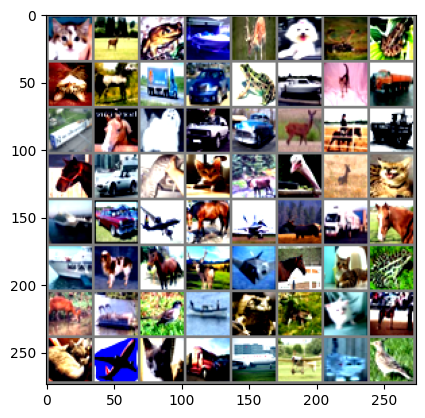

In [6]:
utils.plot_data(data_loader=train_loader,batch=batch_size)

Modelling

In [7]:
nn_model = model.Net_Batch()
model.model_summary(nn_model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 32, 32]             540
       BatchNorm2d-2           [-1, 20, 32, 32]              40
              ReLU-3           [-1, 20, 32, 32]               0
         Dropout2d-4           [-1, 20, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           3,600
       BatchNorm2d-6           [-1, 20, 32, 32]              40
              ReLU-7           [-1, 20, 32, 32]               0
         Dropout2d-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             320
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
      BatchNorm2d-12           [-1, 16, 16, 16]              32
             ReLU-13           [-1, 16, 16, 16]               0
        Dropout2d-14           [-1, 16,

In [8]:
optimizer = optim.SGD(nn_model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.04, epochs=20, steps_per_epoch=len(train_loader))
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(nn_model, device, train_loader, optimizer, criterion)
  utils.test(nn_model, device, test_loader, criterion,torch)
  # scheduler.step()


Epoch 1


Train: Loss=1.4543 Batch_id=781 Accuracy=44.49: 100%|██████████| 782/782 [00:23<00:00, 33.54it/s]


Test set: Average loss: 0.0206, Accuracy: 5238/10000 (52.38%)

Epoch 2


Train: Loss=1.4941 Batch_id=781 Accuracy=56.64: 100%|██████████| 782/782 [00:24<00:00, 31.74it/s]


Test set: Average loss: 0.0168, Accuracy: 6183/10000 (61.83%)

Epoch 3


Train: Loss=0.5558 Batch_id=781 Accuracy=61.20: 100%|██████████| 782/782 [00:24<00:00, 32.15it/s]


Test set: Average loss: 0.0157, Accuracy: 6408/10000 (64.08%)

Epoch 4


Train: Loss=0.9174 Batch_id=781 Accuracy=63.77: 100%|██████████| 782/782 [00:24<00:00, 32.10it/s]


Test set: Average loss: 0.0148, Accuracy: 6611/10000 (66.11%)

Epoch 5


Train: Loss=1.2916 Batch_id=781 Accuracy=66.22: 100%|██████████| 782/782 [00:23<00:00, 33.52it/s]


Test set: Average loss: 0.0142, Accuracy: 6762/10000 (67.62%)

Epoch 6


Train: Loss=0.9180 Batch_id=781 Accuracy=68.00: 100%|██████████| 782/782 [00:22<00:00, 34.46it/s]


Test set: Average loss: 0.0131, Accuracy: 7017/10000 (70.17%)

Epoch 7


Train: Loss=1.3325 Batch_id=781 Accuracy=69.04: 100%|██████████| 782/782 [00:22<00:00, 34.52it/s]


Test set: Average loss: 0.0133, Accuracy: 6996/10000 (69.96%)

Epoch 8


Train: Loss=1.1354 Batch_id=781 Accuracy=69.71: 100%|██████████| 782/782 [00:23<00:00, 32.64it/s]


Test set: Average loss: 0.0126, Accuracy: 7143/10000 (71.43%)

Epoch 9


Train: Loss=1.6126 Batch_id=781 Accuracy=70.73: 100%|██████████| 782/782 [00:24<00:00, 32.12it/s]


Test set: Average loss: 0.0126, Accuracy: 7199/10000 (71.99%)

Epoch 10


Train: Loss=1.2854 Batch_id=781 Accuracy=71.24: 100%|██████████| 782/782 [00:24<00:00, 32.18it/s]


Test set: Average loss: 0.0123, Accuracy: 7254/10000 (72.54%)

Epoch 11


Train: Loss=1.4886 Batch_id=781 Accuracy=71.78: 100%|██████████| 782/782 [00:24<00:00, 32.50it/s]


Test set: Average loss: 0.0120, Accuracy: 7242/10000 (72.42%)

Epoch 12


Train: Loss=1.1980 Batch_id=781 Accuracy=72.30: 100%|██████████| 782/782 [00:22<00:00, 34.19it/s]


Test set: Average loss: 0.0119, Accuracy: 7332/10000 (73.32%)

Epoch 13


Train: Loss=0.8274 Batch_id=781 Accuracy=72.85: 100%|██████████| 782/782 [00:23<00:00, 33.89it/s]


Test set: Average loss: 0.0120, Accuracy: 7363/10000 (73.63%)

Epoch 14


Train: Loss=0.4722 Batch_id=781 Accuracy=73.20: 100%|██████████| 782/782 [00:23<00:00, 33.49it/s]


Test set: Average loss: 0.0115, Accuracy: 7444/10000 (74.44%)

Epoch 15


Train: Loss=1.0544 Batch_id=781 Accuracy=73.49: 100%|██████████| 782/782 [00:24<00:00, 32.11it/s]


Test set: Average loss: 0.0117, Accuracy: 7366/10000 (73.66%)

Epoch 16


Train: Loss=0.9352 Batch_id=781 Accuracy=73.61: 100%|██████████| 782/782 [00:24<00:00, 31.80it/s]


Test set: Average loss: 0.0114, Accuracy: 7456/10000 (74.56%)

Epoch 17


Train: Loss=1.0335 Batch_id=781 Accuracy=73.78: 100%|██████████| 782/782 [00:24<00:00, 31.98it/s]


Test set: Average loss: 0.0112, Accuracy: 7497/10000 (74.97%)

Epoch 18


Train: Loss=0.4694 Batch_id=781 Accuracy=74.22: 100%|██████████| 782/782 [00:24<00:00, 31.51it/s]


Test set: Average loss: 0.0112, Accuracy: 7497/10000 (74.97%)

Epoch 19


Train: Loss=0.5166 Batch_id=781 Accuracy=74.41: 100%|██████████| 782/782 [00:23<00:00, 32.82it/s]


Test set: Average loss: 0.0111, Accuracy: 7540/10000 (75.40%)

Epoch 20


Train: Loss=0.4500 Batch_id=781 Accuracy=74.80: 100%|██████████| 782/782 [00:23<00:00, 33.78it/s]


Test set: Average loss: 0.0109, Accuracy: 7577/10000 (75.77%)



Model Plots

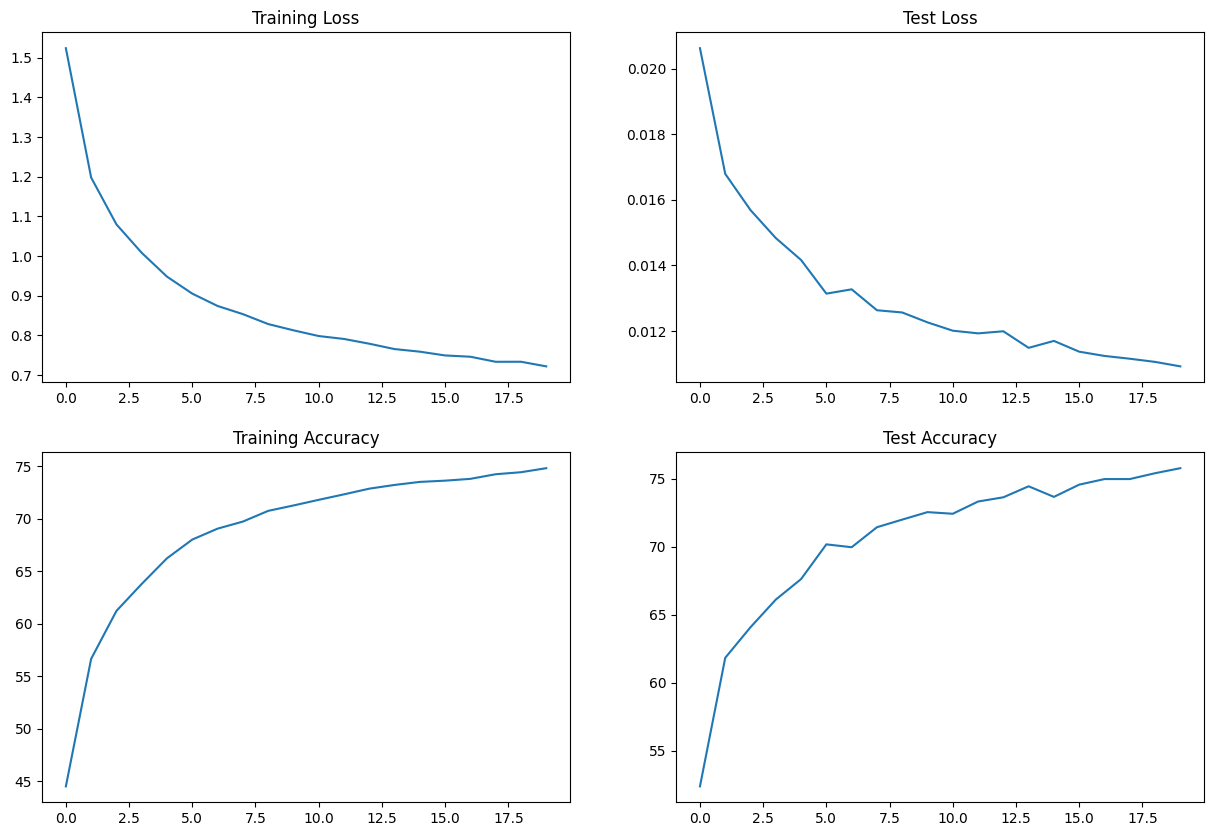

In [9]:
utils.plot_loss_accuracy()

Evaluation

Ground truth:

 truck  horse   deer    cat  plane
Predicted:

 truck  horse   deer    cat  plane


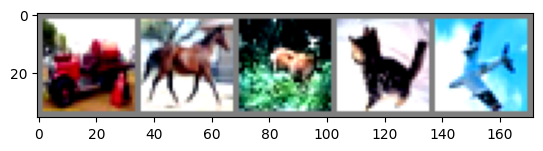

In [10]:
utils.model_evaluation(model=nn_model,device=device,test_loader=test_loader,test_batch_size=5)

Miss Classification

In [14]:
classes = utils.classes
images, labels = next(iter(test_loader))
outputs = nn_model(images.to(device))
_, predictions = torch.max(outputs, 1)
original_label = [classes[labels[j]] for j in range(64)]
predicted_label = [classes[predictions[j]] for j in range(64)]


Ground Truth:  cat
Predicted Label:  dog


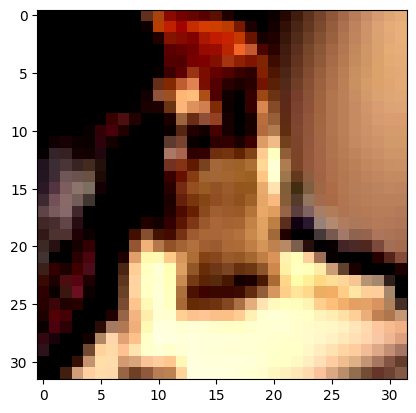

Ground Truth:  deer
Predicted Label:  dog


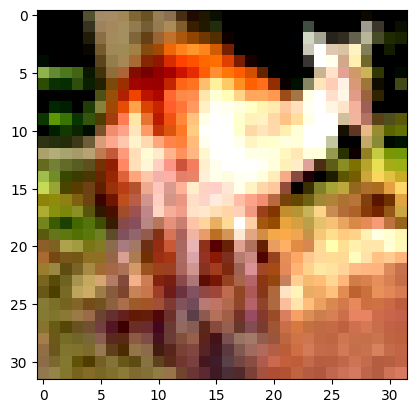

Ground Truth:  bird
Predicted Label:  dog


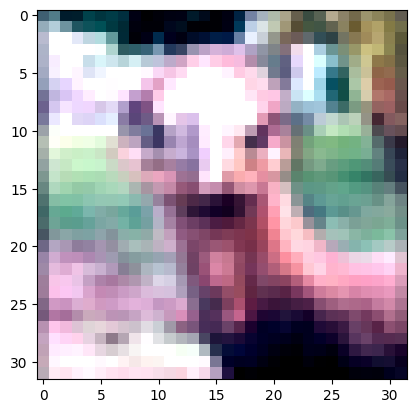

Ground Truth:  dog
Predicted Label:  cat


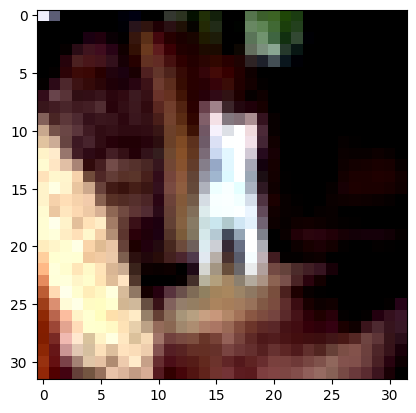

Ground Truth:  bird
Predicted Label:  horse


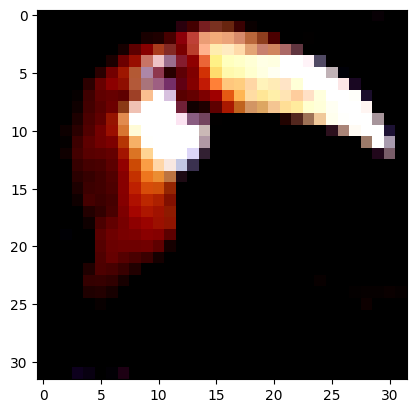

Ground Truth:  car
Predicted Label:  cat


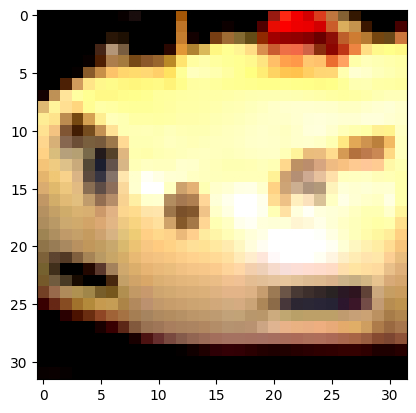

Ground Truth:  dog
Predicted Label:  cat


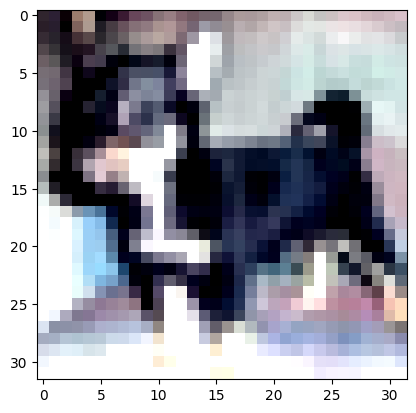

Ground Truth:  ship
Predicted Label:  car


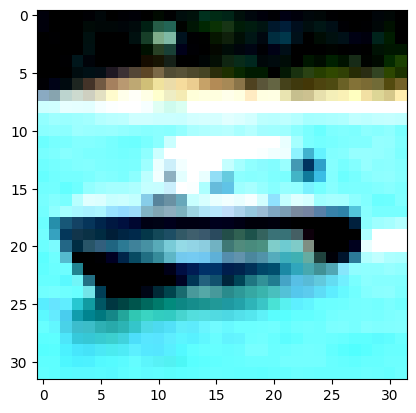

Ground Truth:  frog
Predicted Label:  cat


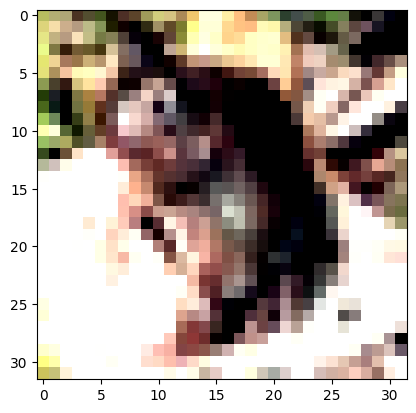

Ground Truth:  deer
Predicted Label:  bird


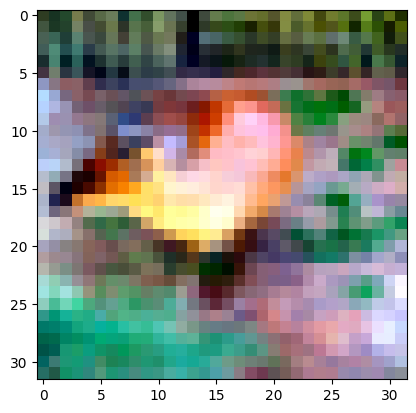

In [28]:
count=1
for i in range(len(original_label)):
  if count>10:
    break
  if original_label[i] != predicted_label[i]:
    print("Ground Truth: ", original_label[i])
    print("Predicted Label: ", predicted_label[i])
    utils.imshow(torchvision.utils.make_grid(images[i]))
    count+=1
